In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import date
import datetime
import calendar
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

df = pd.read_csv('Data.csv')

# correcting time
def find_time(x):
    p = parse(x)
    t = p.strftime('%Y/%m/%d %H:%M:%S')
    return(datetime.datetime.strptime(t, "%Y/%m/%d %H:%M:%S"))
        
df['TimeStamp_C'] = df.apply(lambda row: find_time(row['TimeStamp']), axis=1)

df['date'] = df.apply(lambda row: row['TimeStamp_C'].date(), axis=1)

df1 = df.groupby('date')['TotalHit'].sum().reset_index(name="count")
ts =  df.groupby('date')['TotalHit'].sum()

In [4]:
df2 = df.drop(['TimeStamp', 'date'], axis=1)

In [7]:
col = ['TimeStamp_C','TotalHit']
df2 = df2[col]
df2.to_csv('test.csv')

In [4]:
ts

date
2018-01-01    1166.0
2018-01-02    2457.0
2018-01-03    4428.0
2018-01-04    2437.0
2018-01-05    1538.0
2018-01-06     694.0
2018-01-07     812.0
2018-01-08    2136.0
2018-01-09    2464.0
2018-01-10    1480.0
2018-01-11    1029.0
2018-01-12    1071.0
2018-01-13     622.0
2018-01-14     579.0
2018-01-15    3055.0
2018-01-16    1556.0
2018-01-17     965.0
2018-01-18    1489.0
2018-01-19    3909.0
2018-01-20     640.0
2018-01-21     839.0
2018-01-22    1358.0
2018-01-23    1492.0
2018-01-24    1799.0
2018-01-25    1816.0
2018-01-26     955.0
2018-01-27     660.0
2018-01-28     607.0
2018-01-29    2167.0
2018-01-30    2599.0
               ...  
2018-06-17     186.0
2018-06-18     390.0
2018-06-19    1632.0
2018-06-20    1250.0
2018-06-21    1284.0
2018-06-22    1372.0
2018-06-23     172.0
2018-06-24     132.0
2018-06-25    2071.0
2018-06-26    1916.0
2018-06-27     740.0
2018-06-28    7402.0
2018-06-29    1050.0
2018-06-30     122.0
2018-07-01      92.0
2018-07-02     922.0
2018-07-

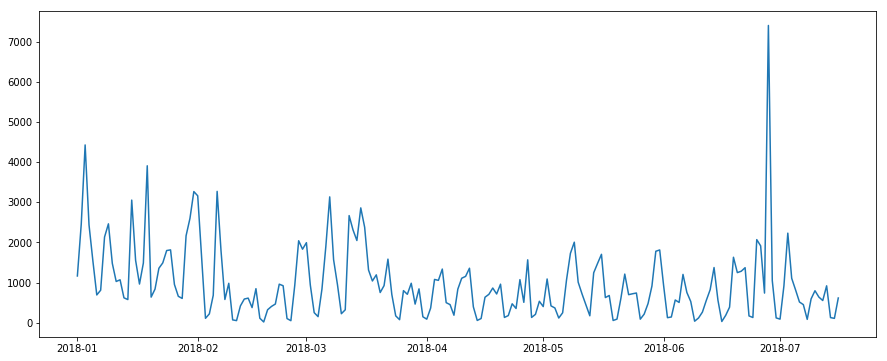

In [130]:
plt.plot(df1['date'],df1['count'])

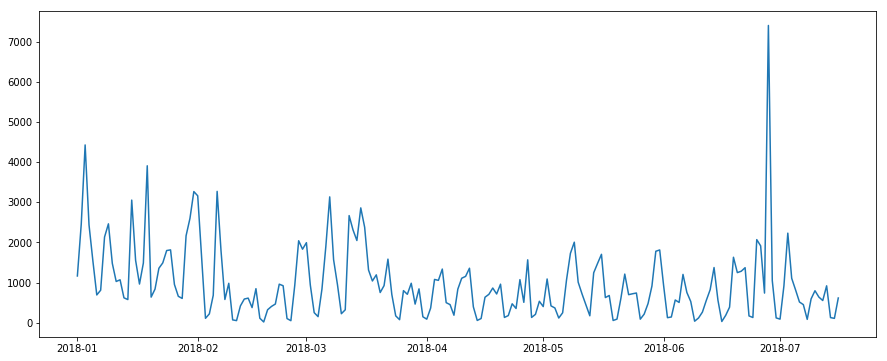

In [132]:
plt.plot(ts)

In [135]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

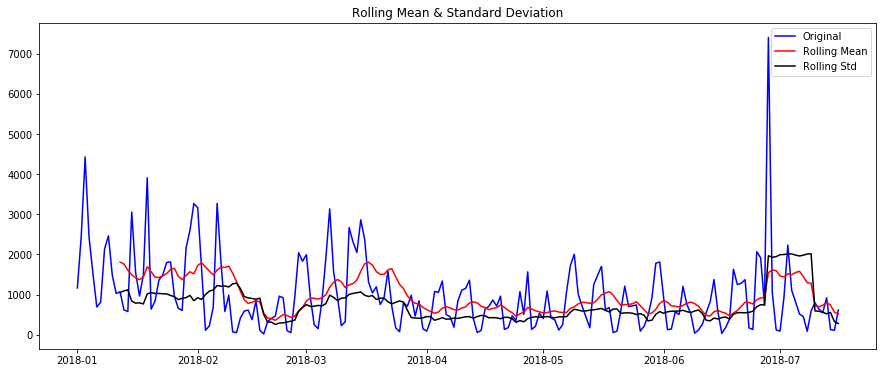

Results of Dickey-Fuller Test:
Test Statistic                  -3.046105
p-value                          0.030807
#Lags Used                       6.000000
Number of Observations Used    190.000000
Critical Value (1%)             -3.465244
Critical Value (5%)             -2.876875
Critical Value (10%)            -2.574945
dtype: float64


In [136]:
test_stationarity(ts)

In [151]:
n = ts.shape[0]
train_size = 0.94
train_df = ts.iloc[:int(n * train_size)]
test_df = ts.iloc[int(n * train_size):]

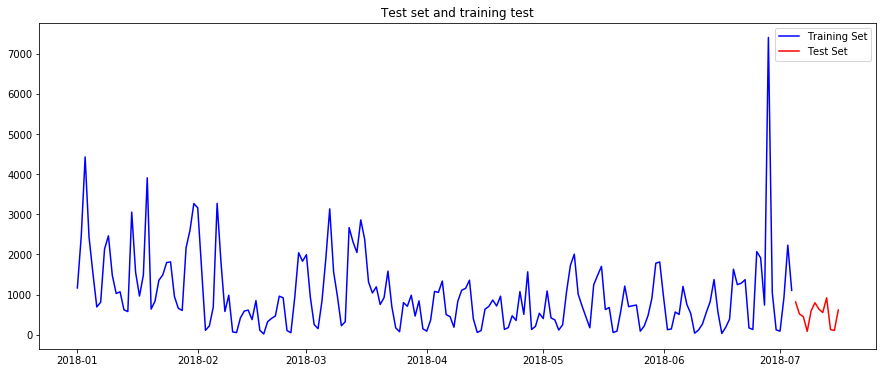

In [152]:
orig = plt.plot(train_df, color='blue',label='Training Set')
mean = plt.plot(test_df, color='red', label='Test Set')
plt.legend(loc='best')
plt.title('Test set and training test')
plt.show(block=False)

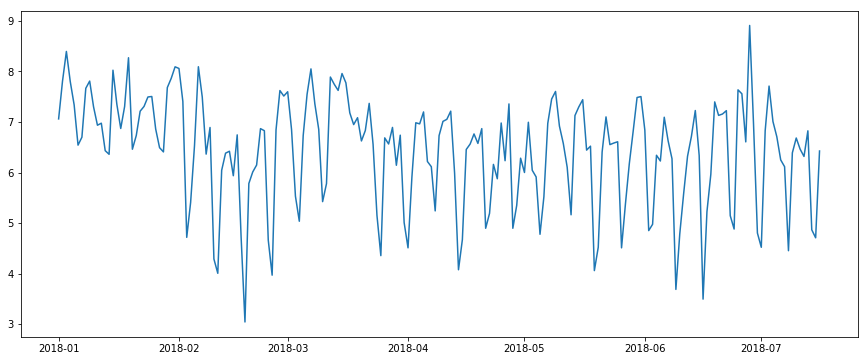

In [161]:
# log transform
ts_log = np.log(ts)
plt.plot(ts_log)

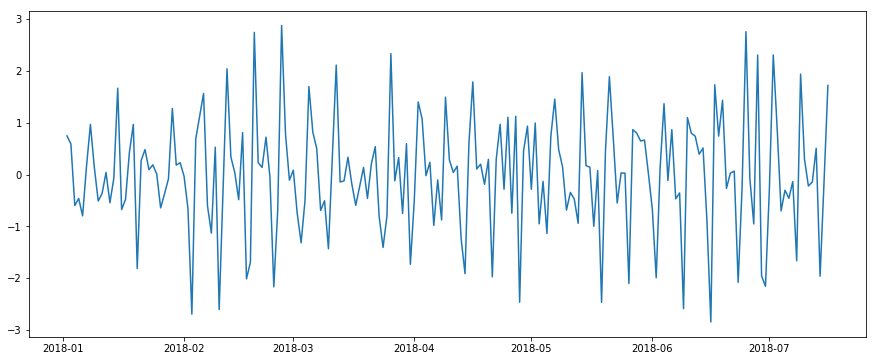

In [162]:
#differencing
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

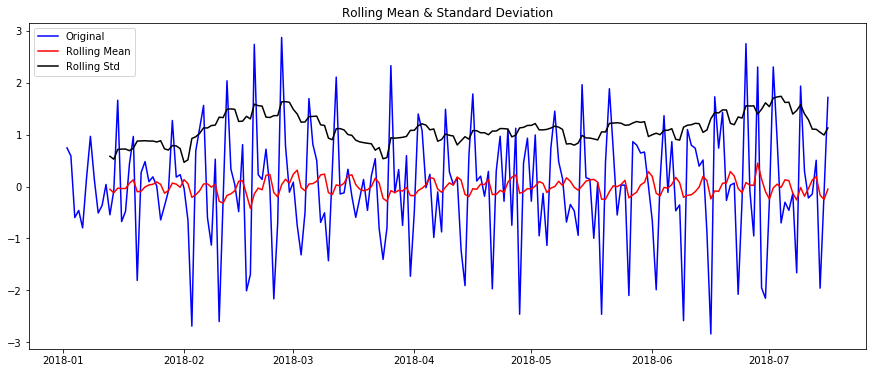

Results of Dickey-Fuller Test:
Test Statistic                  -5.346830
p-value                          0.000004
#Lags Used                      12.000000
Number of Observations Used    183.000000
Critical Value (1%)             -3.466598
Critical Value (5%)             -2.877467
Critical Value (10%)            -2.575260
dtype: float64


In [163]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Text(0.5,1,'Autocorrelation Function')

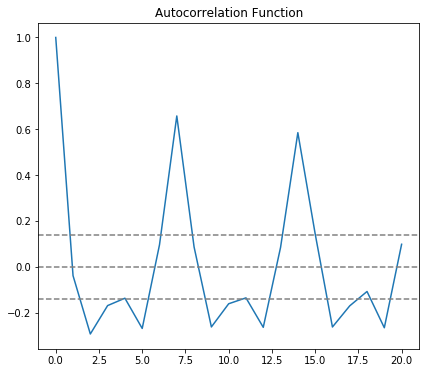

In [164]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Autocorrelation Function')

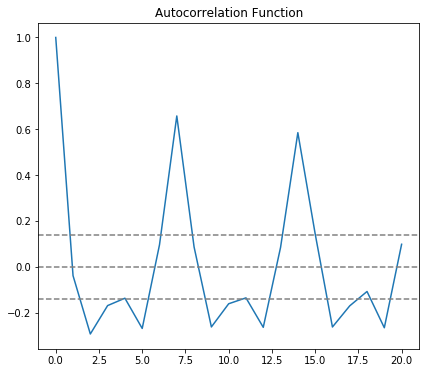

In [165]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 215.5704')

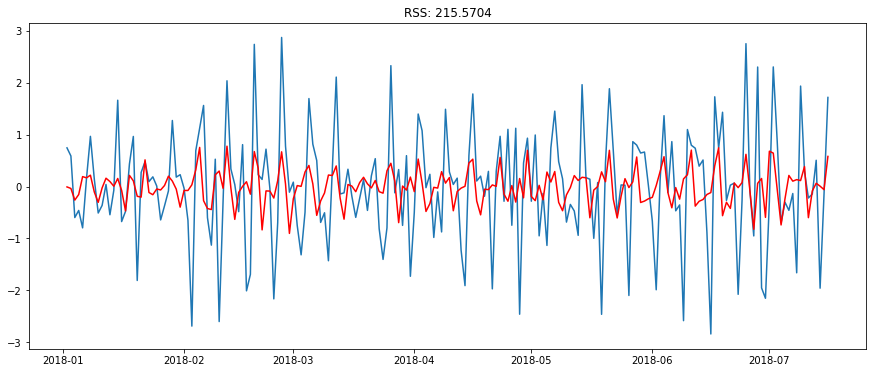

In [166]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 163.1314')

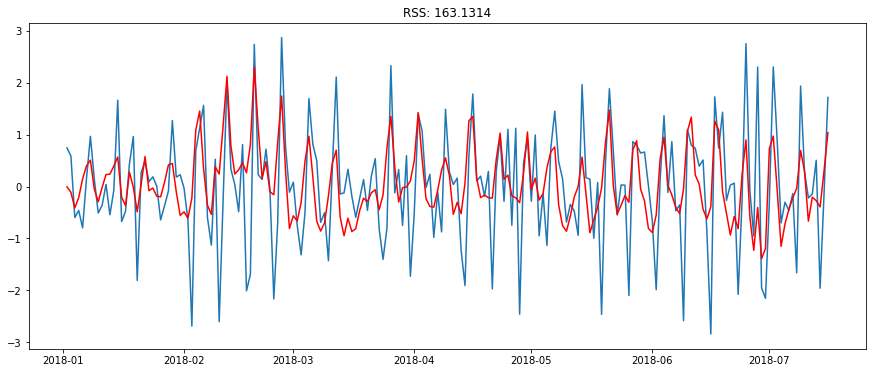

In [167]:
#MA model
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 132.0329')

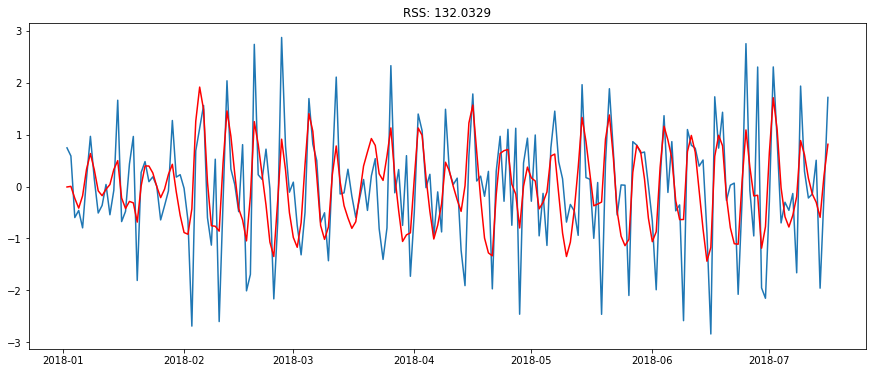

In [168]:
#combined model
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [172]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2018-01-02   -0.008252
2018-01-03    0.003937
2018-01-04   -0.226763
2018-01-05   -0.415293
2018-01-06   -0.177467
dtype: float64
date
2018-01-02   -0.008252
2018-01-03   -0.004315
2018-01-04   -0.231078
2018-01-05   -0.646371
2018-01-06   -0.823838
dtype: float64


C:\Users\I334934\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


date
2018-01-01    7.061334
2018-01-02    7.053083
2018-01-03    7.057020
2018-01-04    6.830256
2018-01-05    6.414963
dtype: float64

Text(0.5,1,'RMSE: 4518.6913')

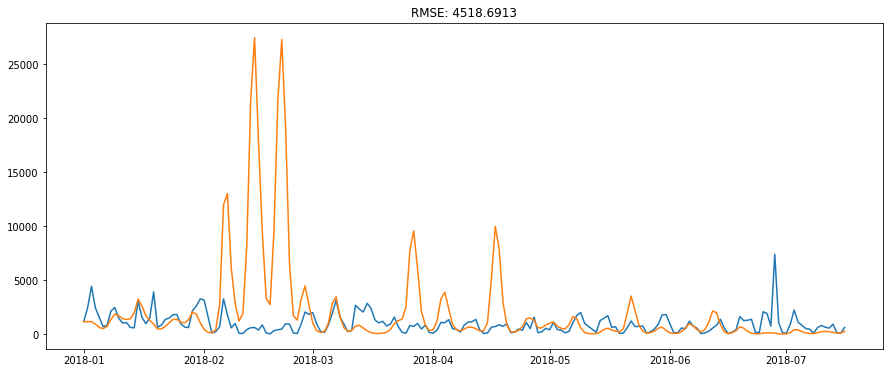

In [173]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))